<a href="https://colab.research.google.com/github/NeoNeuron/CCN2021_TUT/blob/main/dipde_EI.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

---
# DiPDE Example: Excitatory and Inhibitory


In [ ]:
#@title Install `dipde` package
# @markdown install packages to visualize brains and electrode locations
!pip install git+https://github.com/AllenInstitute/dipde.git --user --quiet

In [1]:
## Copyright 2013 Allen Institute
# This file is part of dipde
# dipde is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# dipde is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with dipde.  If not, see <http://www.gnu.org/licenses/>.

import matplotlib.pyplot as plt
from dipde.internals.internalpopulation import InternalPopulation
from dipde.internals.externalpopulation import ExternalPopulation
from dipde.internals.network import Network
from dipde.internals.connection import Connection as Connection
import scipy.stats as sps

def get_network(dv=.001, verbose=False, update_method='approx', approx_order=1, tol=1e-14):

    # Create network:
    b1 = ExternalPopulation('100')
    i1 = InternalPopulation(v_min=-.02, v_max=.02, dv=dv, update_method=update_method, approx_order=approx_order, tol=tol)
    b1_i1 = Connection(b1, i1, 1, weights=.005, delays=([.005, .01],[.5,.5]))
    b1_i1_2 = Connection(b1, i1, 1, weights=-.005, delays=sps.uniform(0,.01))
    network = Network([b1, i1], [b1_i1, b1_i1_2])
    
    return network


def example(show=True, save=False):

    # Settings:
    t0 = 0.
    dt = .0001
    dv = .0001
    tf = .1
    verbose = True
    update_method = 'approx'
    approx_order = 1
    tol = 1e-14
    
    # Run simulation:
    network = get_network(dv=dv, verbose=verbose, update_method=update_method, approx_order=approx_order, tol=tol)
    network.run(dt=dt, tf=tf, t0=t0)

    i1 = network.population_list[1]
    if show == True:

        # Visualize:
        plt.figure(figsize=(3,3))
        plt.plot(i1.t_record, i1.firing_rate_record)
        plt.xlim([0,tf])
        plt.ylim(ymin=0)
        plt.xlabel('Time (s)')
        plt.ylabel('Firing Rate (Hz)')
        plt.tight_layout()

        if save == True: plt.savefig('./excitatory_inhibitory.png')
        plt.show()
    
    return i1.t_record, i1.firing_rate_record
    

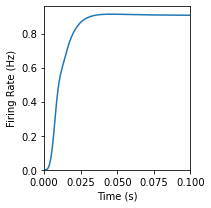

In [2]:
t_record, firing_record = example(show=True)